# 5. Regression ( Bonston house cost )

In [1]:
import numpy as np
import matplotlib .pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 dataframe 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
# boston 데이터 세트의 target 배열은 주택 가격임. 이를 Price 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#DF Boston 결손값 확인
bostonDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


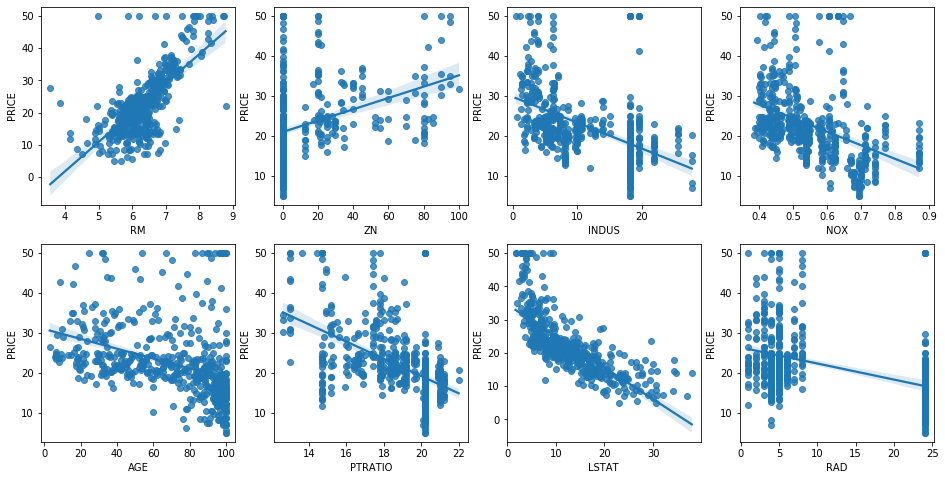

In [6]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize =(16,8), ncols = 4, nrows = 2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x = feature, y='PRICE',data = bostonDF, ax = axs[row][col])

# - 단일 변수에 대한 선형 회귀

In [7]:
from sklearn.model_selection import train_test_split

x = bostonDF['RM']
y = boston.target   #y = bostonDF['PRICE']

X_train , X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2029)

In [8]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [9]:
# DT에서 하나의 컬럼만 가져오게 되면 시리즈로 변환이 되므로 가공 필요.
sim_lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# - 결과 예측하기

In [10]:
y_pred = sim_lr.predict(X_test.values.reshape(-1,1))

# - 결과 확인하기

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,y_pred)


0.3661562123069739

- 계수 w(weight) , 절편 b (bias)

In [12]:
sim_lr.coef_, sim_lr.intercept_

(array([9.4171277]), -36.41849250542624)

- 도출한 회귀식 : Price = 9.4171277 * RM -36.41849250542624

In [13]:
# 위의 결과값을 이용하여 직선과 산점도 표현하기

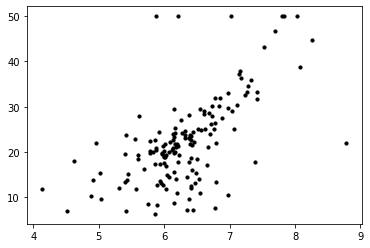

In [14]:
plt.scatter(X_test, y_test, s= 10, c='black')
plt.show()

In [15]:
line_x = np.linspace(np.min(X_test), np.max(X_test), 10 )
line_y = sim_lr.predict(line_x.reshape(-1,1))

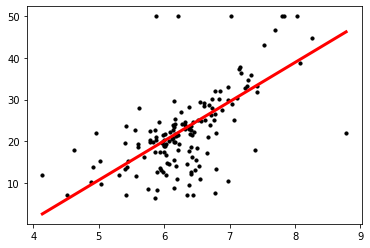

In [16]:
plt.scatter(X_test, y_test, s= 10, c='black')
plt.plot(line_x, line_y, c = 'red', lw = 3)
plt.show()

In [17]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4,8])
ys = xs * w + b


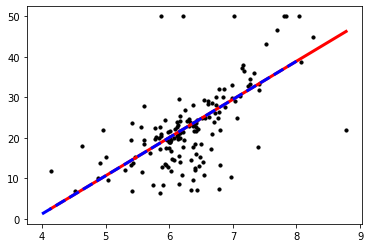

In [18]:
plt.scatter(X_test, y_test, s= 10, c='black')
plt.plot(line_x, line_y, c = 'red', lw = 3)
plt.plot(xs,ys, c = 'blue', lw=3 ,ls ='--')
plt.show()

# LSTAT과 Price 비교

In [19]:
from sklearn.model_selection import train_test_split

x = bostonDF['LSTAT']
y = boston.target   #y = bostonDF['PRICE']

X_train , X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=19)


In [20]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [21]:
# DT에서 하나의 컬럼만 가져오게 되면 시리즈로 변환이 되므로 가공 필요.
sim_lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = sim_lr.predict(X_test.values.reshape(-1,1))

In [23]:
r2_score(y_test,y_pred)

0.5197154926220184

In [24]:
sim_lr.coef_, sim_lr.intercept_

(array([-0.8922435]), 33.591648794612624)

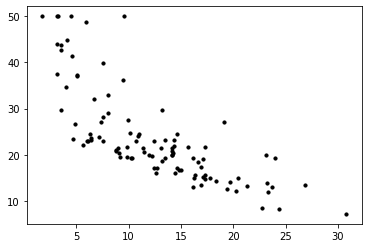

In [25]:
plt.scatter(X_test, y_test, s= 10, c='black')
plt.show()

In [26]:
line_x = np.linspace(np.min(X_test), np.max(X_test), 10 )
line_y = sim_lr.predict(line_x.reshape(-1,1))

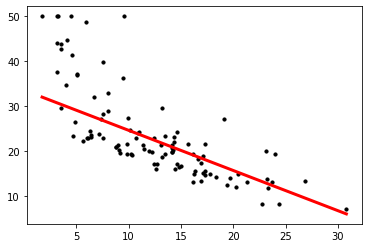

In [27]:
plt.scatter(X_test, y_test, s= 10, c='black')
plt.plot(line_x, line_y, c = 'red', lw = 3)
plt.show()

In [50]:
names = [i for i in bostonDF.columns[1:9]]

names

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD']

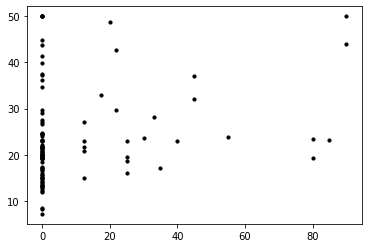

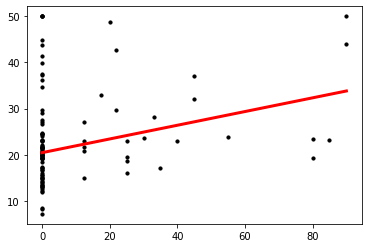

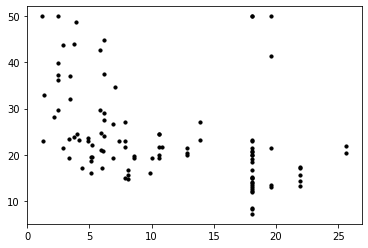

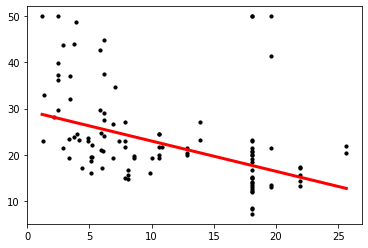

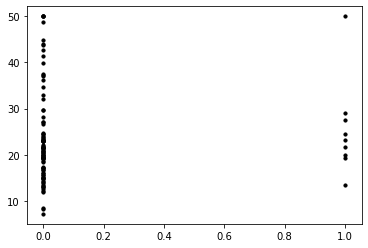

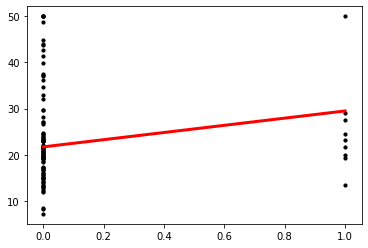

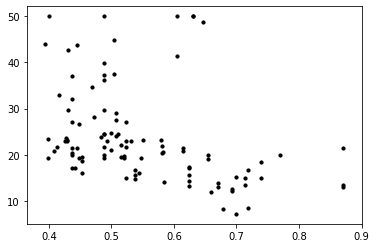

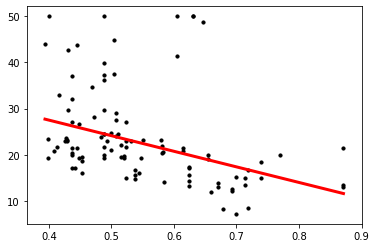

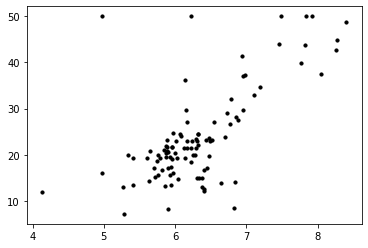

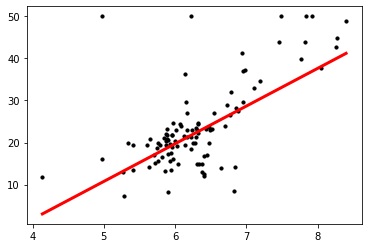

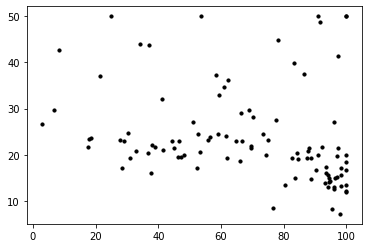

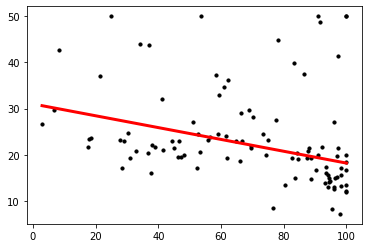

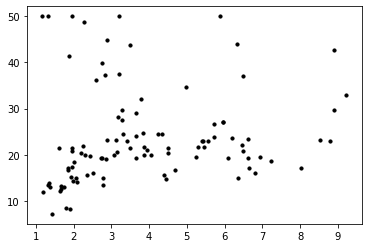

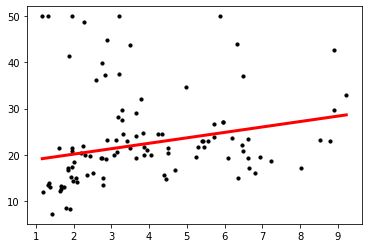

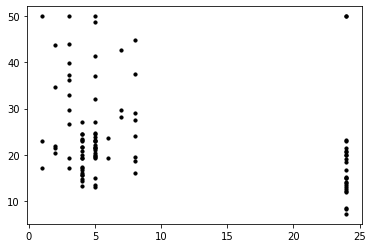

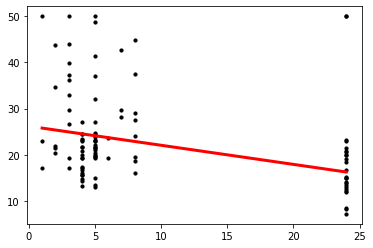

In [51]:
# 도전과제
# Seaborn의 8개 그래프를 우리가 했던 방식으로 해볼것.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for name in names:
    x = bostonDF[name]
    y = boston.target   #y = bostonDF['PRICE']

    X_train , X_test, y_train, y_test = train_test_split(  x
                                                         , y
                                                         , test_size = 0.2
                                                         , random_state=19)
    
    sim_lr = LinearRegression()
    sim_lr.fit(X_train.values.reshape(-1,1), y_train)
    y_pred = sim_lr.predict(X_test.values.reshape(-1,1))
    r2_score(y_test,y_pred)
    sim_lr.coef_, sim_lr.intercept_
    plt.scatter(X_test, y_test, s= 10, c='black')
    plt.show()
    line_x = np.linspace(np.min(X_test), np.max(X_test), 10 )
    line_y = sim_lr.predict(line_x.reshape(-1,1))
    plt.scatter(X_test, y_test, s= 10, c='black')
    plt.plot(line_x, line_y, c = 'red', lw = 3)
    plt.show()

In [ ]:
### Price 와 LSTAT의 다양한 회귀 방법에 따른 RMSE 값

# Decisiono Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

dt_regr.fit(X_train.values.reshape(-1,1), y_train)
y_pred = dt_regr.predict(X_test.values.reshape(-1,1))
rmse_regr = np.round(np.sqrt(mean_squared_error(X_test,y_pred)),2)

# Support Vector Machine Regressor

In [72]:
from sklearn.svm import SVR
svm_regr = SVR()

svm_regr.fit(X_train.values.reshape(-1,1), y_train)
y_pred = svm_regr.predict(X_test.values.reshape(-1,1))
rmse_svm = np.round(np.sqrt(mean_squared_error(X_test,y_pred)),2)

# LinearRegression

In [73]:
from sklearn.linear_model import LinearRegression

dt_lr = LinearRegression()
dt_lr.fit(X_train.values.reshape(-1,1), y_train)
y_pred = dt_lr.predict(X_test.values.reshape(-1,1))
rmse_lr = np.round(np.sqrt(mean_squared_error(X_test,y_pred)),2)

In [75]:
print (rmse_regr , rmse_svm, rmse_lr)

18.55 16.48 17.74


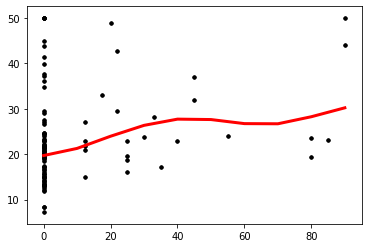

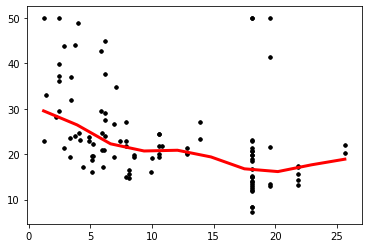

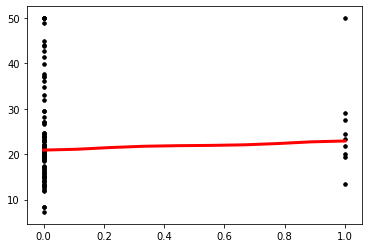

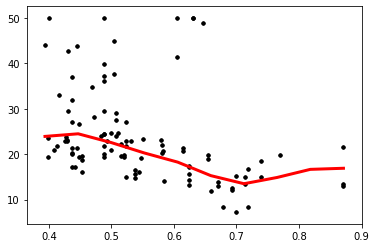

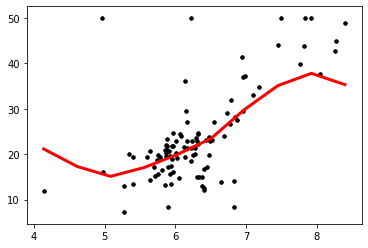

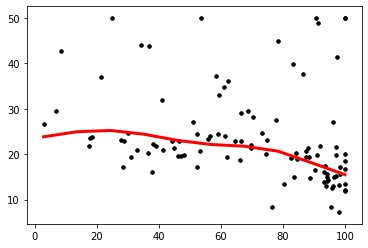

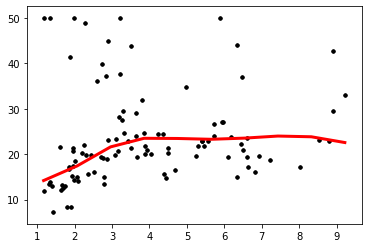

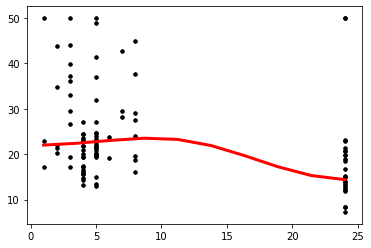

In [63]:
names = [i for i in bostonDF.columns[1:9]]

for name in names:
    x = bostonDF[name]
    y = boston.target   #y = bostonDF['PRICE']

    X_train , X_test, y_train, y_test = train_test_split(  x
                                                         , y
                                                         , test_size = 0.2
                                                         , random_state=19)
    
    
    svm_regr = SVR()
    svm_regr.fit(X_train.values.reshape(-1,1), y_train)
    y_pred = svm_regr.predict(X_test.values.reshape(-1,1))
    r2_score(y_test,y_pred)
    
    plt.scatter(X_test, y_test, s= 10, c='black')
    
    line_x = np.linspace(np.min(X_test), np.max(X_test), 10 )
    line_y = svm_regr.predict(line_x.reshape(-1,1))
    plt.scatter(X_test, y_test, s= 10, c='black')
    plt.plot(line_x, line_y, c = 'red', lw = 3)
    plt.show()